In [5]:
import json
def read_corpus():
    """
    读取给定的语料库，并把问题列表和答案列表分别写入到 qlist, alist 里面。 在此过程中，不用对字符换做任何的处理（这部分需要在 Part 2.3里处理）
    qlist = ["问题1"， “问题2”， “问题3” ....]
    alist = ["答案1", "答案2", "答案3" ....]
    务必要让每一个问题和答案对应起来（下标位置一致）
    """
    # TODO 需要完成的代码部分 ...
    qlist = []
    alist = []
    filename = 'train-v2.0.json'
    datas = json.load(open(filename,'r'))
    data = datas['data']
    for d in data:
        paragraph = d['paragraphs']
        for p in paragraph:
            qas = p['qas']
            for qa in qas:
                #print(qa)
                #处理is_impossible为True时answers空
                if(not qa['is_impossible']):
                    qlist.append(qa['question'])
                    alist.append(qa['answers'][0]['text'])
    assert len(qlist) == len(alist)  # 确保长度一样
    return qlist, alist
qlist,alist = read_corpus()

In [ ]:
'famous?'

In [6]:
import nltk
from nltk.corpus import stopwords
import codecs
import re

def lowerCase(ori_list):
    return [q.lower() for q in ori_list]
def tokenizer(ori_list):
    #分词时处理标点符号
    SYMBOLS = re.compile('[\s;\"\",.!?\\/\[\]\{\}\(\)-]+')
    new_list = []
    for q in ori_list:
        words = SYMBOLS.split(q.strip())
        new_list.append(' '.join(words))
    return new_list

# nltk中stopwords包含what等，但是在QA问题中，这算关键词，所以不看作关键词    
def removeStopWord(ori_list):
    new_list = []
    restored = ['what','when','which','how','who','where']
    english_stop_words = list(set(stopwords.words('english')))#['what','when','which','how','who','where','a','an','the'] #
    for w in restored:
        english_stop_words.remove(w)
    for q in ori_list:
        sentence = ' '.join([w for w in q.strip().split(' ') if w not in english_stop_words])
        new_list.append(sentence)
    return new_list

def removeLowFrequence(ori_list,vocabulary,thres = 10):
    #根据thres筛选词表，小于thres的词去掉
    new_list = []
    for q in ori_list:
        sentence = ' '.join([w for w in q.strip().split(' ') if vocabulary[w] >= thres])
        new_list.append(sentence)
    return new_list

def replaceDigits(ori_list,replace = '#number'):
    #将数字统一替换为replace,默认#number
    DIGITS = re.compile('\d+')
    new_list = []
    for q in ori_list:
        q = DIGITS.sub(replace,q)
        new_list.append(q)
    return new_list

# 定义处理一个单词的函数: 使用参数来控制是否变换小写及停用词去除；接受的是数组list
def handle_sentence(word_list, isLowCase=True, isStopWord=True, isReplaceDigits=True):
    if isLowCase:
        word_list = lowerCase(word_list)
    word_list = tokenizer(word_list)
    if isStopWord:
        word_list = removeStopWord(word_list)
    if isReplaceDigits:
        word_list = replaceDigits(word_list)
    return word_list

new_qlist = handle_sentence(qlist)

In [16]:
# 首先先来看一下总词数
from collections import Counter
words_dict = dict()
for q in new_qlist: 
    for w in q.split(' '):
        if w in words_dict:
            words_dict[w] += 1
        else:
            words_dict[w] = 1
word_total = len(words_dict)
print (word_total)

37731


In [24]:
# 统计一下qlist中出现1次，2次，3次... 出现的单词个数， 然后画一个plot. 这里的x轴是单词出现的次数（1，2，3，..)， y轴是单词个数
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
#counts：key出现N次，value：出现N次词有多少
counts = dict()
for w,c in words_dict.items():
    if c in counts:
        counts[c] += 1
    else:
        counts[c] = 1

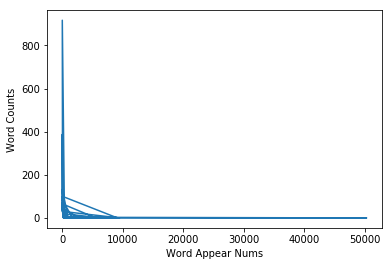

In [26]:
x_data = list(dict_appear_counts.keys())
y_data = list(dict_appear_counts.values())
fig = plt.figure()  #设置画布
ax1 = fig.add_subplot(111)
k = 50
plt.plot(x_data[:k], y_data[:k])
ax1.set_xlabel(u'Word Appear Nums')
ax1.set_ylabel(u'Word Counts')
plt.show()